In [1]:
import sys
sys.path.append("../../src")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as r

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

from validation.CV import validator
from preprocessing.preproc import read_dfs
from helpers import helpers as hlp

In [3]:
#test
a = np.array([[2,3],[5,6],[8,9]])
b = np.array([1,4,7])
hlp.training_test_split(*hlp.shuffle(a,b))

(matrix([[5, 6],
         [2, 3]]), matrix([[4],
         [1]]), matrix([[8, 9]]), matrix([[7]]))

In [4]:
dataset = load_iris()
pca = PCA(n_components=2)

In [5]:
data = dataset.data
data_2d = pca.fit_transform(data)
labels = dataset.target

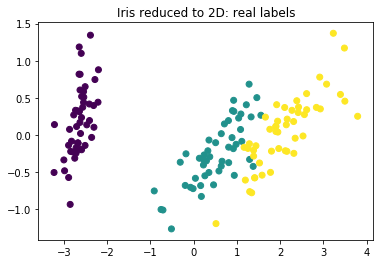

In [6]:
plt.title("Iris reduced to 2D: real labels")
plt.scatter(data_2d[:,0],data_2d[:,1], c=labels)

In [7]:
training_data_2d, training_labels, test_data_2d, test_labels = hlp.training_test_split(*hlp.shuffle(data_2d,labels), training_size=0.6)
clf = SVC(gamma='auto', kernel='linear')
clf.fit(training_data_2d,np.ravel(training_labels))
pred_labels = clf.predict(np.array(test_data_2d))

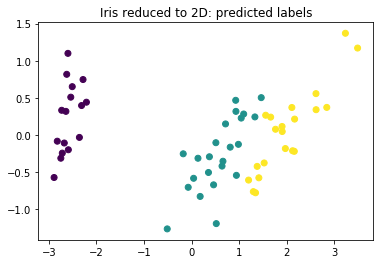

In [8]:
plt.title("Iris reduced to 2D: predicted labels")
plt.scatter(np.array(test_data_2d)[:,0],np.array(test_data_2d)[:,1], c=pred_labels)

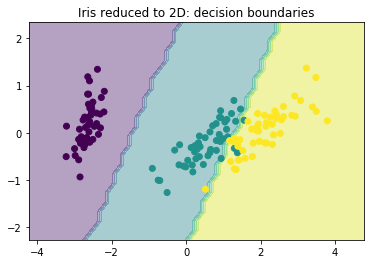

In [9]:
plt.title("Iris reduced to 2D: decision boundaries")
hlp.draw_decision_boundary_2d(data_2d, clf, labels)

In [10]:
validator(data, labels, clf, KFold(n_splits=5, shuffle=True))

{'avg_missclass': 0.013333333333333332,
 'avg_acc': 0.9866666666666667,
 'avg_prec': 0.9866666666666667,
 'avg_F1': 0.9866666666666667,
 'avg_scaled_conf_mx': array([[50.,  0.,  0.],
        [ 0., 48.,  2.],
        [ 0.,  0., 50.]]),
 'avg_conf_prob_mx': array([[0.33333333, 0.        , 0.        ],
        [0.        , 0.32      , 0.01333333],
        [0.        , 0.        , 0.33333333]])}

In [11]:
df_phen, df_xp = read_dfs()

In [12]:
labels = np.array(df_phen['"grupa"'])
data = np.array(df_xp)

In [13]:
print(set(labels))

{1, 2, 3, 4, 5}


In [18]:
training_data, training_labels, test_data, test_labels = hlp.training_test_split(*hlp.shuffle(data,labels), training_size=0.6)
clf = SVC(gamma='auto', kernel='poly', degree=6)
clf.fit(training_data,np.ravel(training_labels))
#pred_labels = clf.predict(np.array(test_data))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=6, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
validator(data, labels, clf, KFold(n_splits=5, shuffle=True))

{'avg_missclass': 0.7018181818181819,
 'avg_acc': 0.29818181818181816,
 'avg_prec': 0.29818181818181816,
 'avg_F1': 0.2981818181818182,
 'avg_scaled_conf_mx': array([[3., 3., 2., 0., 0.],
        [1., 6., 3., 2., 2.],
        [2., 3., 1., 2., 3.],
        [2., 2., 1., 0., 1.],
        [1., 4., 3., 1., 6.]]),
 'avg_conf_prob_mx': array([[0.05636364, 0.05636364, 0.03636364, 0.        , 0.        ],
        [0.01818182, 0.11090909, 0.05636364, 0.03818182, 0.03818182],
        [0.03636364, 0.05454545, 0.02      , 0.03636364, 0.05454545],
        [0.03818182, 0.03636364, 0.01818182, 0.        , 0.02      ],
        [0.01818182, 0.07272727, 0.05454545, 0.01818182, 0.11090909]])}

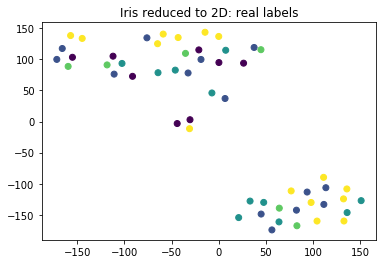

In [20]:
#pca = PCA(n_components=50)
tsne = TSNE(n_components=2,perplexity=10)
#data_50d = pca.fit_transform(data)
data_2d = tsne.fit_transform(data)
plt.title("Iris reduced to 2D: real labels")
plt.scatter(data_2d[:,0],data_2d[:,1], c=labels)

# None statistics and others

In [21]:
df_phen.columns.values

array(['"grupa"', '"cywilny"', '"Wiek"', '"plec"', '"Waga"', '"wzrost"',
       '"BMI"', '"pas"', '"biodra"', '"WHR"', '"praca"', '"stres"',
       '"akt_fiz"', '"ile_lat"', '"nikotyn_teraz"', '"nikotyn_przeszlo"',
       '"alko_tyg"', '"piwo"', '"wino"', '"wodka"', '"sol"',
       '"owoc_warz"', '"ryby"', '"wien_kob"', '"wien_mez"', '"HTZ"',
       '"LLHT"', '"Lcentral"', '"Iporel"', '"Bb"', '"Ab"', '"ACEi"',
       '"statyna"', '"sartan"', '"Cab"', '"diuretyk"', '"Spironol"',
       '"ASA"', '"cukrzycowe"', '"antykoag"', '"Bronchodil"', '"IPP"',
       '"NTproBNP"', '"ARO"', '"aldosteron"', '"HGB"', '"Hct"', '"RBC"',
       '"PLT"', '"WBC"', '"MCH"', '"MCHC"', '"MCV"', '"RDW_CV"', '"NEUT"',
       '"LYM"', '"MONO"', '"EOS"', '"BASO"', '"Sod"', '"Potas"',
       '"Chlorki"', '"Wapn"', '"Kreatynina"', '"Mocznik"', '"Glukoza"',
       '"Albuminy"', '"Chol_cal"', '"HDL"', '"LDL"', '"TG"', '"AST"',
       '"ALT"', '"Bilirubina"', '"Insulina"', '"hs_CRP"', '"TSH"',
       '"Fibrynogen"', '

In [22]:
def get_none_statistics(percent_from, percent_to):
    none_percentage = (df_phen.isna().sum()/df_phen.shape[0]*100)
    return none_percentage.loc[(none_percentage > percent_from) & (none_percentage <= percent_to)]

In [23]:
get_none_statistics(0., 5.)

"Wiek"          1.851852
"RDW_CV"        1.851852
"Sod"           1.851852
"Potas"         1.851852
"Chlorki"       1.851852
"Wapn"          3.703704
"Kreatynina"    1.851852
"Chol_cal"      1.851852
"HDL"           1.851852
"LDL"           1.851852
"TG"            1.851852
"Bilirubina"    1.851852
"Insulina"      1.851852
"Kortyzol"      1.851852
"X0.8_PWV"      1.851852
"PWV_1"         1.851852
"SD_PWV1"       3.703704
"T"             3.703704
"SD_T"          3.703704
"SBP4"          1.851852
"DBP4"          1.851852
"SBPC"          1.851852
"DBPC"          1.851852
"PPC"           1.851852
"AG"            1.851852
"AlxP"          1.851852
"AlxC_AG_PP"    1.851852
"AlxP2_P1"      1.851852
"specSBP"       1.851852
"specDBP"       1.851852
"przykor"       3.703704
dtype: float64